In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Add_sales_data_2018.csv')

In [3]:
data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [5]:
data.info

<bound method DataFrame.info of            Date  Add1(in Thousands)  Add2(in Thousands)  Add3(in Thousands)  \
0    2018-10-08              208.00              222.25              206.85   
1    2018-10-05              217.00              218.60              205.90   
2    2018-10-04              223.50              227.80              216.15   
3    2018-10-03              230.00              237.50              225.75   
4    2018-10-01              234.55              234.60              221.05   
..          ...                 ...                 ...                 ...   
200  2017-12-14              288.00              288.25              279.20   
201  2017-12-13              290.00              292.50              282.20   
202  2017-12-12              298.60              298.60              286.65   
203  2017-12-11              290.00              299.55              285.90   
204  2017-12-08              287.55              289.90              285.05   

     Add4(in Thousa

In [6]:
data.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

# check whether there is any relationship between the amount spent for advertising through five different companies and profit generated

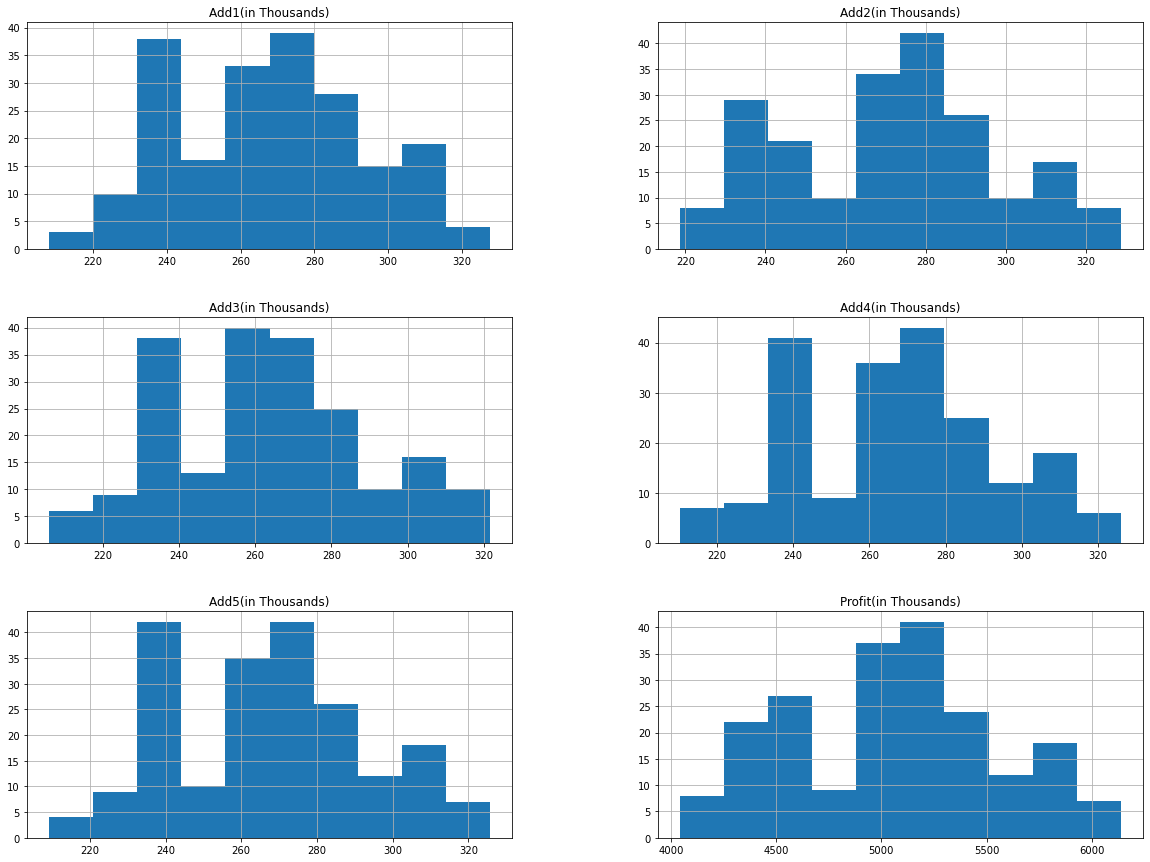

In [7]:
freqgraph = data.select_dtypes(include=['int32','int64','float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [8]:
# distribution of money spent is almost similar across the 5 companies

<AxesSubplot:>

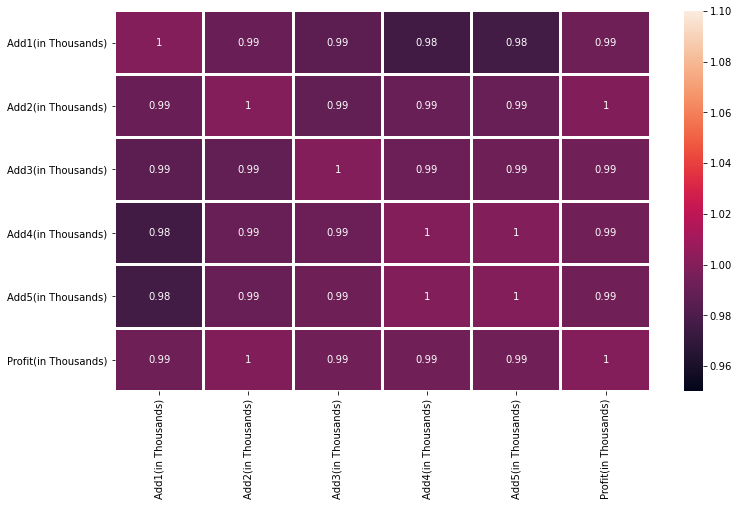

In [9]:
corrmatrix = data.corr()
plt.subplots(figsize=(12,7))
sns.heatmap(corrmatrix,vmin=0.95,vmax=1.1,annot=True,linewidth=2)

In [10]:
#For further analysis all the datas are taken into account without dropping any

Text(0.5, 1.0, 'Ad Spendings vs Profit')

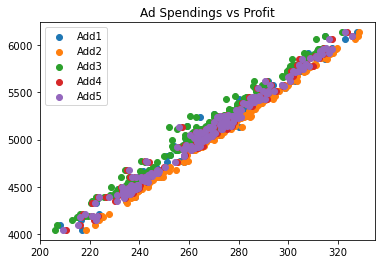

In [11]:
xx=data['Add1(in Thousands)']
yy=data['Profit(in Thousands)']
plt.scatter(x=xx,y=yy)
xx=data['Add2(in Thousands)']
plt.scatter(x=xx,y=yy)
xx=data['Add3(in Thousands)']
plt.scatter(x=xx,y=yy)
xx=data['Add4(in Thousands)']
plt.scatter(x=xx,y=yy)
xx=data['Add5(in Thousands)']
plt.scatter(x=xx,y=yy)
plt.legend(['Add1','Add2','Add3','Add4','Add5'])
plt.title('Ad Spendings vs Profit')

In [13]:
#The high correlation and linear relation of the ad spendings and profits can be seen in these scatter plots

# Build a regression model to predict the profit from the given data and comment your findings on it

In [14]:
from sklearn.model_selection import train_test_split

y = data['Profit(in Thousands)']
X = data.drop(['Profit(in Thousands)','Date'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=40,test_size=0.25)

In [16]:
from sklearn import linear_model

lr = linear_model.LinearRegression()

In [17]:
model = lr.fit(X_train,y_train)

In [18]:
fit_values = model.predict(X_test)

In [19]:
# comparing the predicted values with test values
print('\n', y_test,'\t', np.transpose(fit_values))


 116    5395.217
5      4404.686
89     4898.776
35     4419.421
185    5903.253
81     5027.633
123    5238.366
138    5247.011
69     5030.451
118    5318.100
143    5134.657
186    5861.830
96     4647.356
26     4451.999
191    5780.799
144    5111.806
161    5212.949
23     4465.950
77     5187.445
37     4480.363
54     4671.113
28     4416.136
100    5131.898
97     4648.834
168    5616.791
136    4915.682
18     4190.965
109    5577.150
125    5153.977
142    5163.322
33     4513.600
46     4558.651
172    5789.791
90     4887.296
11     4435.571
170    5728.804
140    5250.150
59     5190.814
64     5239.060
151    5146.949
164    4997.719
199    5425.371
155    5078.636
129    5140.372
42     4432.864
120    5182.368
149    5177.610
196    5676.934
93     4705.198
67     5001.615
179    6137.800
24     4435.174
Name: Profit(in Thousands), dtype: float64 	 [5395.217 4404.686 4898.776 4419.421 5903.253 5027.633 5238.366 5247.011
 5030.451 5318.1   5134.657 5861.83  4647.356 44

In [20]:
from sklearn.metrics import mean_squared_error
print('MSE is',mean_squared_error(y_test,fit_values))

MSE is 3.8177566733216664e-25


In [21]:
from sklearn.metrics import r2_score
print('R squared value is',r2_score(y_test,fit_values))

R squared value is 1.0


In [22]:
# checking model with lasso with different random set

X_train_ls,X_test_ls,y_train_ls,y_test_ls = train_test_split(X,y,test_size=0.3)

ls = linear_model.Lasso()
model_ls = ls.fit(X_train_ls,y_train_ls)
fit_values_ls = model.predict(X_test)
print('MSE is',mean_squared_error(y_test,fit_values_ls))
print('R squared value is',r2_score(y_test,fit_values))

MSE is 3.8177566733216664e-25
R squared value is 1.0


In [23]:
# checking data with SVR model

from sklearn.svm import SVR
SVR = SVR(C=8, epsilon=0.2, gamma=0.5)
svr_model=SVR.fit(X_train,y_train) 
fit_values_svr=model.predict(X_test)
print('MSE is',mean_squared_error(y_test,fit_values_svr))
print('R squared value is',r2_score(y_test,fit_values_svr))

MSE is 3.8177566733216664e-25
R squared value is 1.0


# Predict the profit generated by the company, if they wish to spend the following amount for advertisement

In [24]:
# predicting the profit for following values
X_test_2 = pd.DataFrame({"Add1(in Thousands)":[290], "Add2(in Thousands)":[312], "Add3(in Thousands)":[309], "Add4(in Thousands)":[298], "Add5(in Thousands)":[320]})
X_test_2

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands)
0,290,312,309,298,320


In [27]:
fit_values_2 = model.predict(X_test_2)
fit_values_2

array([5820.06])

In [29]:
#The projected profit for this combination of ad spendings is 5820.06 Thousand